# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

# --------------------------------------------------------------------------
# 1. Data Validation
## 1) Validating and Filtering Data for Client requirements
   This study did two steps for validating data. One is cleansing and filtering data for client requirements. The client mentioned that other pet types should not be included in the analysis. Therefore, we filtered only four types of pets: dogs, cats, fish, and birds. Moreover, the raw data file has a dollar sign and comma in the sales attribute, so this study removed these symbols to convert the sales field to the integer type. 

## 2) Building and Mapping New Attributes for Analysis
   Another is building and mapping new attributes to run the Logistic Regression Model. This study mapped all categorical variables to each dummy variable; Product category, Pet type, and Pet size. We mainly converted pet size data to ordinal variables because we wanted to inspect the distribution of pet size data.

In [28]:
## Data VALIDATION CODES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat # for T-Test
import statsmodels.api as sm # Logistic Regression Analysis
url = 'https://drive.google.com/file/d/1V5ETozCUBi1dbJ9QzJQNGR5ZiG6QhoR6/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data['sales'] = data['sales'].str.replace('$', '') # Replace $ sign
data['sales'] = data['sales'].str.replace(',', '') # Replace Comma sign
data[['sales']] = data[['sales']].apply(pd.to_numeric) # Convert object Sales to Int64 (numeric)
data['product_id'] = data['product_id'].astype(str) # Convert integer product_id to String
pet_type_to_keep = ['fish', 'dog', 'cat', 'bird'] # Filter by pet type only fish, dog, cat, and bird
bs = data[data.pet_type.isin(pet_type_to_keep)] # Finalize analyzing base
bs['pet_size_n'] = bs['pet_size'].map({'extra_small': 1, 'small':2, 'medium': 3, 'large': 4, 'extra_large': 5})
pet_type_unique = bs.pet_type.unique() # Checking for pet_type unique records
product_category_unique = bs.product_category.unique() # Cheking for product_category unique records
pet_size_unique = bs.pet_size.unique() # Checking for pet_size Unique records

# Built Pet Type Unique record's dummy
for x in pet_type_unique:
    bs[x + '_dummy'] = np.where(bs['pet_type'] == x, 1, 0) # Build Pet Type Dummy
    
# Built Product Category Unique record's dummy
for y in product_category_unique:
    bs[y + '_dummy'] = np.where(bs['product_category'] == y, 1, 0) # Build product Category Dummy
    
# Built Pet size Unique record's dummy
for z in pet_size_unique:
    bs[z + '_dummy'] = np.where(bs['pet_size'] == z, 1, 0) # Build pet size Dummy
    
print(bs.head(5))


  product_id product_category   sales   price vendor_id pet_size pet_type  \
0       5040        Equipment  123000   94.81   VC_1605    small     fish   
1       4567             Toys   61000  120.95   VC_1132    small      cat   
3       4364            Snack   69000  241.27    VC_929    large      dog   
4       4184      Supplements  138000  133.68    VC_749    large      dog   
5       4609          Bedding  183000   51.60   VC_1174    large      cat   

   rating  re_buy  pet_size_n  ...  Housing_dummy  Food_dummy  Clothes_dummy  \
0       7       1           2  ...              0           0              0   
1      10       0           2  ...              0           0              0   
3       1       1           4  ...              0           0              0   
4      10       0           4  ...              0           0              0   
5      10       0           4  ...              0           0              0   

   Accessory_dummy  Grooming_dummy  small_dummy  large_d

C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\505438764.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['sales'] = data['sales'].str.replace('$', '') # Replace $ sign
C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\505438764.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs['pet_size_n'] = bs['pet_size'].map({'extra_small': 1, 'small':2, 'medium': 3, 'large': 4, 'extra_large': 5})
C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\505438764.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of single variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

# --------------------------------------------------------------------------
# 2. Summary of research
   This study aimed to answer the questions from the client company, which is named PetMind. The main question of the client was what products are more likely to be purchased again for different types of pets. Moreover, the client plans to launch a monthly pet box subscription in three months. Consequently, this study's research purpose is below:
   
   First, test statistical evidence of differences between repurchased and one-time-purchased products. 
   Second, inspect influential determinants of product repurchasing through a statistical model.
   Third, Suggest products that have more probability of repurchasing on the client's new subscription service.

   For these purposes, this study has done the following steps:
   Step. 1: Descriptive Statistic Analysis.
   Step. 2: Mean Comparison Analysis between repurchased and one-time-purchased products.
   Step. 3: Logistic Regression Analysis for repurchased products.

## Client Question Summary.
## Client Question 1: How many products are being purchased more than once?
   
   Answer: 390 products repurchased once or more.

## Client Question 2: Do the products being purchased again have better sales than others?
   
   Answer: There is no statistical evidence about mean sales differences between repurchased and one-time-purchased products.
   
## Client Question 3: What products are more likely to be purchased again for different types of pets?

   Answer: Bedding, Medicine, Food, and Equipment products categories in dogs have a positive probability of purchasing again in subscription service. 


# 3. Descriptive Statistics

## (1) Nominal Data Description
   
   The raw dataset has five nominal data columns; Product ID, Product Category, Vendor ID, Pet Size, and Pet Type. [Table. 1] shows descriptive statistics of all nominal variables. Product ID has a total of 833 records, each unique. Also, Vendor ID has unique 833 records.

In [29]:
# [TABLE 1. - Descriptive Statistics of Nominal Variables]
bs.describe(include=[object])

,product_id,product_category,vendor_id,pet_size,pet_type
count,833,833,833,833,833
unique,833,11,833,5,4
top,5040,Equipment,VC_1605,small,cat
freq,1,137,1,271,347


Product Category has eleven categories; Accessory, Bedding, Clothes, Equipment, Food, Grooming, Housing, Medicine, Snack, Supplements, and Toys. Toys and Equipment have 137 products, and Snack has 136 products. Refer to < Chart. 1>. 

<Figure size 1000x600 with 0 Axes>

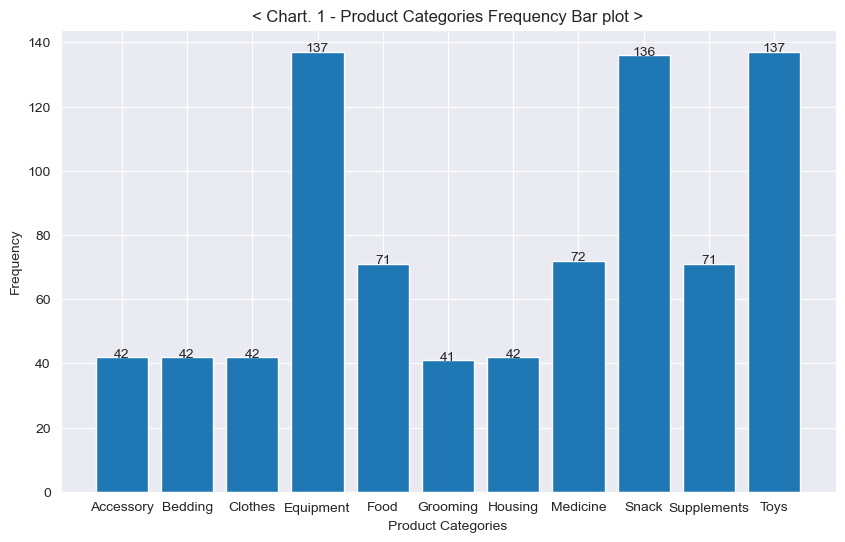

In [30]:
# < Chart. 1 - Product Categories Frequency Bar plot >
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('product_category')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
addlabels(name, val)
plt.grid(True)
plt.xticks(name)
plt.xlabel('Product Categories')
plt.ylabel('Frequency')
plt.title('< Chart. 1 - Product Categories Frequency Bar plot >')
plt.show()

The Pet size category has five categories; extra small, small, medium, large, and extra large. Over 500 products are small and medium size pet products. The Pet type category has four categories; dogs, cats, fish, and birds. Dog and cat types have 347 products each, bird types have 69 products, and fish have 70 products. < Chart. 2>. 

<Figure size 1000x600 with 0 Axes>

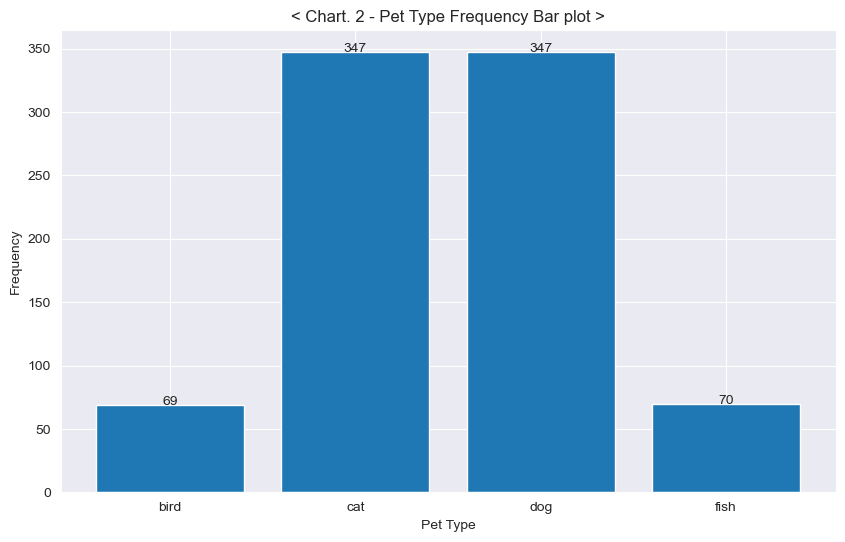

In [31]:
# < Chart. 2 - Pet Type Frequency Bar plot >
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('pet_type')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
addlabels(name, val)
plt.grid(True)
plt.xticks(name)
plt.xlabel('Pet Type')
plt.ylabel('Frequency')
plt.title('< Chart. 2 - Pet Type Frequency Bar plot >')
plt.show()

   Finally, this study checked products of the repurchased and one-time-purchased categories. According to < Chart. 3 > 390 products are repurchased more than once, while 443 are purchased only once. This result could answer the client's first question: how many products are being purchased more than once? 

<Figure size 1000x600 with 0 Axes>

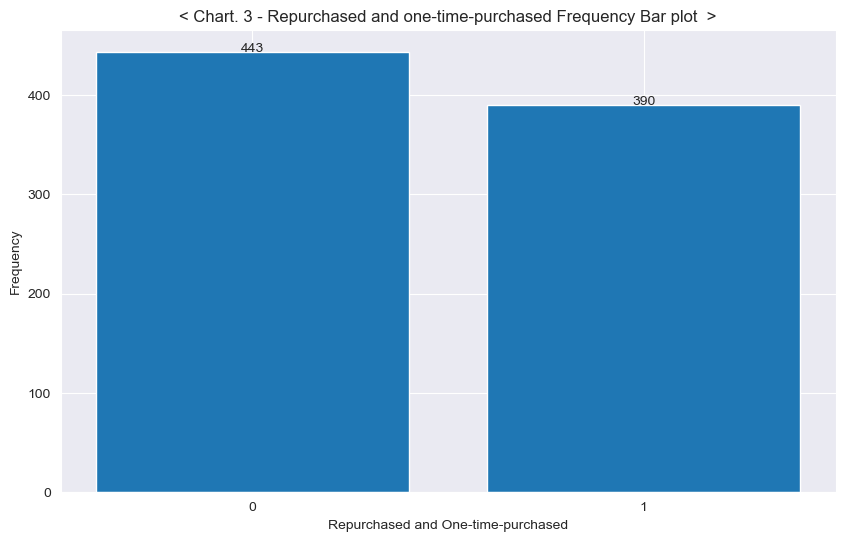

In [32]:
# < Chart. 3 - Repurchased and one-time-purchased Frequency Bar plot >
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('re_buy')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
addlabels(name, val)
plt.grid(True)
plt.xticks(name)
plt.xlabel('Repurchased and One-time-purchased')
plt.ylabel('Frequency')
plt.title('< Chart. 3 - Repurchased and one-time-purchased Frequency Bar plot  >')
plt.show()

## (2) Numeric Data Desciption
   
   The raw dataset has numeric variables. According to the Dataset description, Sales represented the product's sales in dollars last year, and price means that the product's price is in dollars. Lastly, the Rating column contained the customer's rating of the product on a 10-point scale. [Table. 2] shows descriptive statistics of those numeric variables. The mean of sales is 116,100 dollars, meaning that the client's products had an average of 116,110 sales last year. The mean price was approximately 128 dollars, which means the average price of each product. The mean rating is 6.53, which covered customer satisfaction with products was more than the expected average of 5.5 on 10 point scale. 

In [33]:
# [Table. 2 - Descriptive Statistics of Sales, Price, and Rating]
bs[['sales', 'price', 'rating']].describe()

,sales,price,rating
count,833.000000,833.000000,833.000000
mean,116100.840336,127.994802,6.530612
std,66324.790235,72.552580,2.843572
min,3000.000000,0.350000,1.000000
25%,59000.000000,63.300000,5.000000
50%,116000.000000,129.520000,6.000000
75%,177000.000000,189.250000,10.000000
max,230000.000000,252.690000,10.000000


   This study examined the distribution of each numeric variable to answer the client's second question. <Chart. 4> presented histogram of sales variable. The sales distribution of all data has no normal distribution. Moreover, it looks almost unified distribution. This result means that each product's sales are not concentrated with the mean, and the mean has not meaningful. Thus, division by categories is needed to explore central tendency.

[Text(0.5, 0, 'Sales Bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, '<Chart. 4 - Sales Histogram >')]

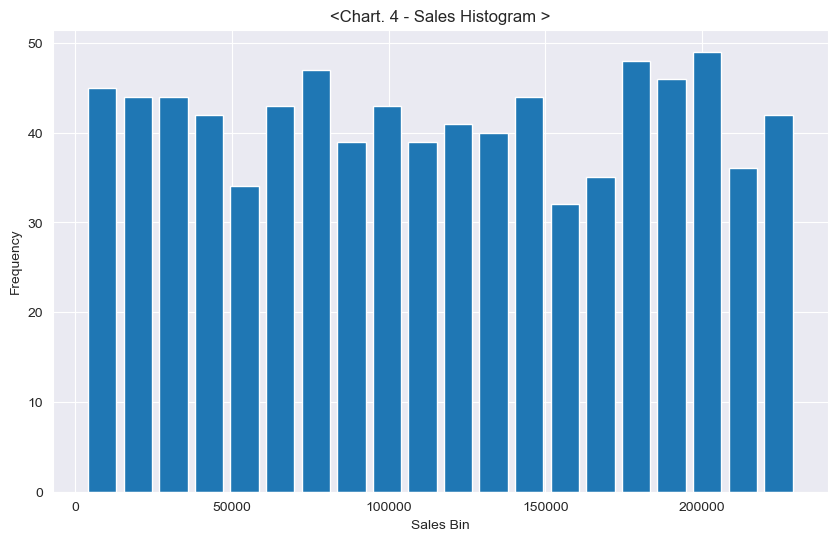

In [34]:
# <Chart. 4 - Sales Histogram >
ax1 = bs.sales.hist(bins=20, rwidth=0.8, figsize=(10,6))
ax1.set(xlabel='Sales Bin', ylabel='Frequency', title='<Chart. 4 - Sales Histogram >')

   Same as the sales variable, the price attribute also looks similar to the distribution. From <Chart. 5>, there are five peaks of frequencies, even though it does not exist around the mean price. In this case, we need to explore price distributions by each category and each pet type.

[Text(0.5, 0, 'Price Bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, '<Chart. 5 - Price Histogram >')]

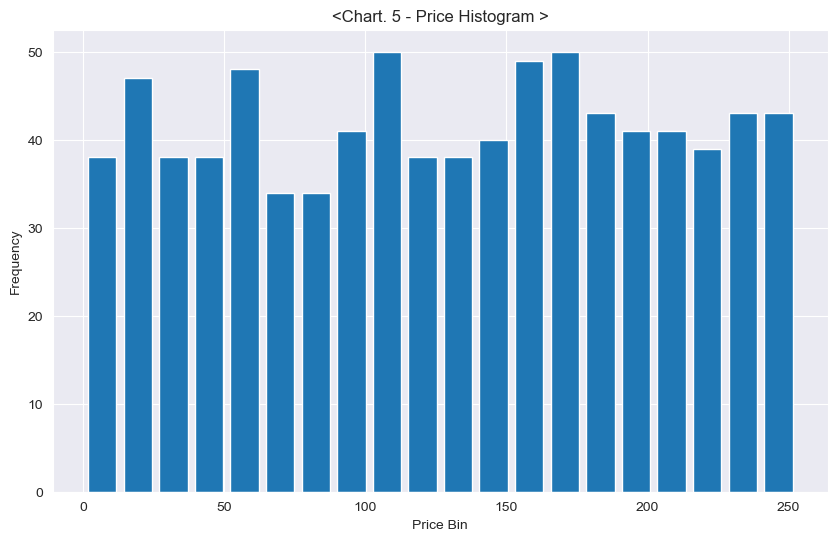

In [35]:
# <Chart. 5 - Price Histogram >
ax2 = bs.price.hist(bins=20, rwidth=0.8, figsize=(10,6))
ax2.set(xlabel = 'Price Bin', ylabel = 'Frequency', title='<Chart. 5 - Price Histogram >')

Lastly, <Chart. 6> shows the distribution of ratings on 10 points scale. This chart has two peaks. One is 6, and another is 10. This result makes us assume that almost all satisfied customers from the products give 10 points, while customers who did not gratify by the products give points lower than 10 points. However, to specify this result, we must examine that classified by each nominal variable. 

<Figure size 1000x600 with 0 Axes>

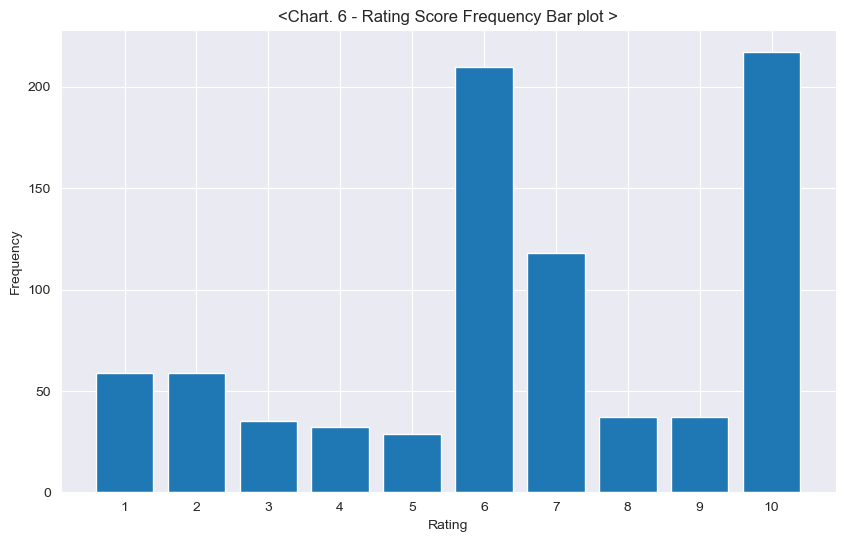

In [36]:
# <Chart. 6 - Rating Score Frequency Bar plot >
fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('rating')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
plt.xticks(name)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('<Chart. 6 - Rating Score Frequency Bar plot >')
plt.show()

## (3) Result of descriptive statistics
   
   By running descriptive statistics, this study examined that dataset validation was well along the client's requirements and explored the distribution of numeric variables. Moreover, this study answered that 390 products were repurchased, facing the client's first question. 
In the next stage, this study explores the datasets grouped by categorical variables and repurchasing status. Through this approach, this study examined the mean comparison test. 

# 4. Mean Comparison between Repurchased and One-time-purchased products

## (1) Mean Comparison for entire sales data.
   
   This study checked sales data by repurchasing status to face the client's second question. The client's question was that the products being purchased again have better sales than others. This study defined hyperthesis below to prove this question:

H.0: The mean sales of repurchased products are equal to or less than those of one-time-purchased products.
H.1: The mean sales of repurchased products are more than those of one-time-purchased products.

This study tested this hypothesis through mean comparison analysis with a t-test.

First, this study compared the mean sales of each repurchase status. The mean of repurchased product sales (re_buy = 1) is 116,890 dollars, while the mean of one-time-purchased product sales (re_buy = 0) is 115,406 dollars. The difference between the two statuses is  1,483 dollars. According to <Chart. 7>, the two group's distribution and mean are almost identical. 

In [37]:
bs.groupby('re_buy')['sales'].mean()

re_buy
0    115406.320542
1    116889.743590
Name: sales, dtype: float64

Text(0.5, 1.0, '<Chart. 7 - Mean Sales Box plot grouped by Repurchased Status >')

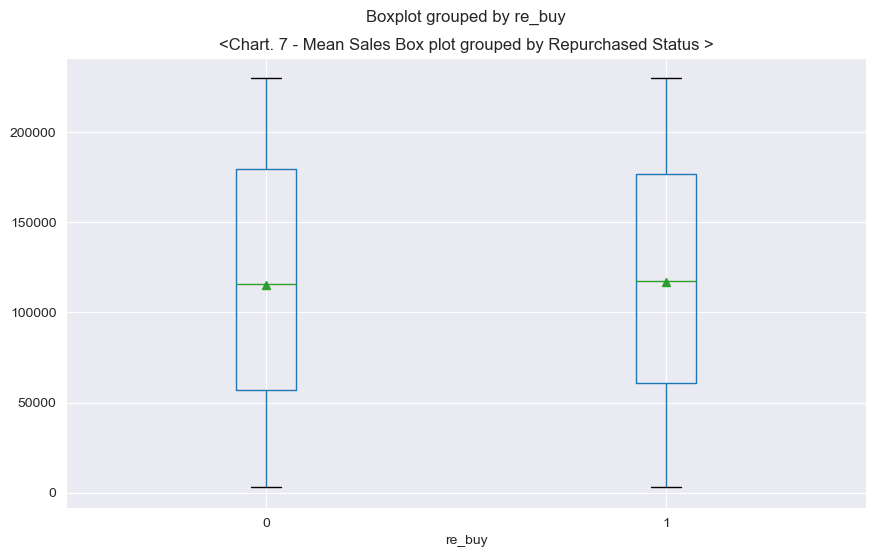

In [38]:
# <Chart. 7 - Mean Sales Box plot grouped by Repurchased Status >
bs.boxplot(column = 'sales', by = 're_buy', grid = True, showmeans=True, figsize=(10, 6))
plt.title('<Chart. 7 - Mean Sales Box plot grouped by Repurchased Status >')

   However, we cannot prove the differences using only the chart. Thus, this study built a statistical model to run a t-test and examined t-statistics and p-values. Before running the t-test, we tested an equal variance test between the two groups. According to the Levene test for equality of variance, F-statistics is 1.413, and the p-value is 0.235, which means that the two groups variances are not equal in p < 0.05 significant level. At last, we examined the t-test based on assumed unequal variance.  
The t-statistics of mean comparisons is 0.322, and the p-value is 0.749, which means that the two groups' mean sales are equal in p < 0.05 significant level. The null hypothesis could not be rejected.
   This result means repurchased products have slightly more sales results than one-time-purchased ones. Nevertheless, this gap is not significant statistically. Consequently, the answer to the client's second question is that there is no statistical difference in mean between repurchased and one-time-purchased products.

## (2) Mean sales comparison between repurchased and one-time-purchased in detail categories.
   
   This study researched the mean of sales between repurchased and one-time-purchased products has no significant difference. On the other hand, the client wanted to figure out what products are more likely to be purchased again for different types of pets. Furthermore, the client wondered which products fit the monthly pet box subscription. To solve these questions, this study investigated which categories of products and types of pets perform more average sales between repurchased and one-time-purchased products.
   First, [Table. 3] results from the mean comparison analysis between repurchased and one-time-purchased products in the pet types category. The repurchased products for the bird have an average of 120,893 dollars more than the one-time-purchased products for the bird. The repurchased products for the cat had an average 116,315 dollars more than the one-time-purchased for it, the repurchased products for the dog had an average 115,218 dollars more than another, and the repurchased products for the fish had an average 126,778 dollars more than one-time-purchased products. However, these mean differences are not statistically significant.    

In [39]:
# [Table 3. - Mean comparison Analysis in pet types.]
tstats = []
pet_type_unique = bs.pet_type.unique()
for x in pet_type_unique:
    inner = []
    tg = bs[bs['pet_type'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats.append(inner)
t_result = pd.DataFrame(tstats, columns=['pet_type', 't_stat', 'p_value', 'GAP'])
mean_result = bs.groupby(['pet_type','re_buy'])['sales'].mean().reset_index()
pd.merge(mean_result, t_result, on=['pet_type'])

# I could not find any statistical evidence that repurchasing items in pet_type makes more sales.

,pet_type,re_buy,sales,t_stat,p_value,GAP
0,bird,0,118560.975610,0.142569,0.887117,2331.881533
1,bird,1,120892.857143,0.142569,0.887117,2331.881533
2,cat,0,115587.912088,0.100585,0.919939,727.239427
3,cat,1,116315.151515,0.100585,0.919939,727.239427
4,dog,0,113627.118644,0.224365,0.822607,1590.528415
5,dog,1,115217.647059,0.224365,0.822607,1590.528415
6,fish,0,118953.488372,0.484600,0.630013,7824.289406
7,fish,1,126777.777778,0.484600,0.630013,7824.289406


   Second, [Table. 4] shows the result of the mean comparison analysis between repurchased and one-time-purchased products in 11 product categories. According to the result, Accessory, Equipment, Food, and Housing category products purchased more than once had more average sales than one-time-purchased products. On the other hand, Bedding, Clothes, Grooming, Medicine, Snack, and Supplements, purchased more than once, had lower average sales than one-time-purchased products. Moreover, all these gaps were not statistically significant.
Consequently, this study could not find any other statistical evidence about the mean differences between repurchased and one-time-purchased products in every category.

In [40]:
# [Table. 4 - Mean comparison Analysis in product categories.]
tstats = []
product_category_unique = bs.product_category.unique()
for x in product_category_unique:
    inner = []
    tg = bs[bs['product_category'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats.append(inner)
t_result = pd.DataFrame(tstats, columns=['product_category', 't_stat', 'p_value', 'GAP'])
mean_result = bs.groupby(['product_category','re_buy'])['sales'].mean().reset_index()
pd.merge(mean_result, t_result, on=['product_category'])

,product_category,re_buy,sales,t_stat,p_value,GAP
0,Accessory,0,127136.363636,1.096782,0.279358,22563.636364
1,Accessory,1,149700.000000,1.096782,0.279358,22563.636364
2,Bedding,0,125166.666667,-0.043446,0.965571,-875.000000
3,Bedding,1,124291.666667,-0.043446,0.965571,-875.000000
4,Clothes,0,135695.652174,-0.803689,0.426357,-17748.283753
5,Clothes,1,117947.368421,-0.803689,0.426357,-17748.283753
6,Equipment,0,113044.117647,1.121544,0.264082,12463.128730
7,Equipment,1,125507.246377,1.121544,0.264082,12463.128730
8,Food,0,102264.705882,0.305956,0.760567,5086.645469
9,Food,1,107351.351351,0.305956,0.760567,5086.645469


# 5. Logistic Regression Model for Repurchased products.

   At last, this study aimed to inspect the effectiveness of every variable in repurchasing. The repurchasing variable named re_buy has a binomial value, 1 means repurchased, and 0 means one-time-purchased. Therefore, this study designed the Logistic Regression Model that aimed at product repurchased status. This model has a binomial variable (re_buy) as a dependent variable and all other numeric values as independent variables. Furthermore, inspecting the influence of each product category and pet type converted all categorical variables to dummy variables. Finally, the model was designed based on one dependent variable for repurchasing status and 17 independent variables.
Before examining the model, we calculated the correlation matrix between each variable. [Table. 5] shows all correlations between each variable. 
Unfortunately, no variables have a meaningful correlation with repurchasing status.

In [41]:
# [Table. 5 - Correlation Matrix ]
corr = bs.corr() # Check correlations between all numeric values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(3))

C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\673535565.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,sales,price,rating,re_buy,pet_size_n,fish_dummy,cat_dummy,dog_dummy,bird_dummy,Equipment_dummy,Toys_dummy,Snack_dummy,Supplements_dummy,Bedding_dummy,Medicine_dummy,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
price,0.008,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rating,0.003,0.057,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
re_buy,0.011,0.061,-0.091,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pet_size_n,0.008,0.032,0.084,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fish_dummy,0.027,-0.003,-0.022,-0.050,-0.124,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cat_dummy,-0.002,-0.012,0.031,0.012,0.152,-0.256,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dog_dummy,-0.022,-0.009,0.033,0.037,-0.115,-0.256,-0.714,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bird_dummy,0.015,0.040,-0.093,-0.038,0.059,-0.091,-0.254,-0.254,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Equipment_dummy,0.022,0.015,-0.097,0.032,-0.045,0.064,-0.040,-0.040,0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


   To solve these despairing situation, this study approached building a statistical model for each pet type. Then finally, this study could find significant insight into the dog category. Our final model included two numeric variables (Price and Rating),10 product type dummy variables (Equipment, Snack, Supplements, Bedding, Medicine, Housing, Food, Clothes, Accessory, and Grooming), and four pet size dummy variables (Extra small, small, medium, and Extra large). According to [Table. 6], model is fitted in p < 0.01 level, and pseudo R-squared is .071. Rating, Bedding dummy, Medicine Dummy, and Food dummy variables are significant in p < 0.05. Price and Equipment Dummy variables are significant in p < 0.1 level. Rating variables have a negative effect on repurchasing status, and it means that higher-rating products have less chance to repurchase. All product category dummy variables have a positive effect on repurchasing status, which means that all variables have more positive rather than the Toys dummy variable, which was the base dummy for avoiding the dummy trap. The significant positive product category is the Bedding category, which has a 1.7962 coefficient, the Medicine category has a 1.1412 coefficient, and the Food category has a 0.9685 coefficient.

In [42]:
# [Tabel. 6 - Logistic Regression Model in Dog products.]
# Define X and Y variables.
feature_cols = [
                # Numeric Variables
                'price', # Price for each product
                'rating', # Rating for each product
                #'pet_size_n', # Ordinal Variable for pet size 
                # ------------------------------------- Product Category Dummy
                'Equipment_dummy', 
                #'Toys_dummy', 
                'Snack_dummy',
                'Supplements_dummy', 
                'Bedding_dummy', 
                'Medicine_dummy',
                'Housing_dummy', # Generally housing is not purchasing more than once.
                'Food_dummy', 
                'Clothes_dummy', 
                'Accessory_dummy', 
                'Grooming_dummy', #is Base Dummy. Avoiding Dummy Trap
                # -------------------------------------- Pet Size Dummy
                'extra_small_dummy',
                'small_dummy',
                'medium_dummy',
                #'large_dummy',
                'extra_large_dummy'
               ]
det = bs[bs['pet_type'] == 'dog']
X = det[feature_cols] # Independent Variables dataset
y = det.re_buy # Dependent Variable

x_sm = sm.add_constant(X)
logit_model = sm.Logit(y, x_sm)
result = logit_model.fit(method = 'ncg')
print(result.summary2()) # Checking Coefficients and P-Values and Model Evaluation

# Rating, Bedding_Dummy, Medicine_Dummy, and Food_Dummy are significant in p < 0.05 level.
# Price and Equipment_Dummy are significant in p < 0.1 Level.
# Model's p-value is significant in p < 0.01 level.
# Peudo R-squared: 0.071.

Optimization terminated successfully.
         Current function value: 0.643619
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Hessian evaluations: 10
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.071    
Dependent Variable:  re_buy           AIC:              480.6715 
Date:                2023-01-02 23:54 BIC:              546.1100 
No. Observations:    347              Log-Likelihood:   -223.34  
Df Model:            16               LL-Null:          -240.45  
Df Residuals:        330              LLR p-value:      0.0050560
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.2072   0.5531 -0.3747 0.7079 -1.2913  0.8768
price              0.0027   0

# 6. Conclusions
   
   This study analyzed which product categories and pet types affected repurchasing by designing a logistic regression model for the repurchasing status binomial variable as a dependent variable. Furthermore, this study examined the statistical mean of sales amount differences between repurchased and one-time-purchased products. As a consequence, there is no difference between repurchased and one-time-purchased products in average sales statistically. On the other hand, the logistic regression model could prove that some product categories positively affected repurchasing products for dogs. 
   Based on the above result, this study suggests some products that are more likely to be purchased again in a new subscription service. 
   Bedding, Medicine, Food, and Equipment products categories in dogs product seem to have a positive probability of purchasing again in subscription service. Specifically, [Table. 7] represented 137 products to suggest new subscription services. 
   Before picking products, however, this study strongly recommends considering about rating points of each product. The customer highly rates some products, but others have lower rating points even though they had been repurchased. This study could not cover the in-depth analysis of these phenomena because lack of data. The client needs to check the products which have lower rating points but has repurchased records. Moreover, check the products with higher rating points but were not repurchased. These data assume that some products provided higher satisfaction to the customer but were optional to repurchase, such as Bedding products that only use in winter. Other products gave customers lower quality, but customers needed help finding substitute goods quickly, such as food products only sold by PetMind.

In [43]:
# [Tabel. 7] Suggested products list for subscription service.
# Bedding_Dummy, Medicine_Dummy, Food_Dummy, Equipment_Dummy for dog product

final = bs[(bs['pet_type'] == 'dog') & (
                                (bs['product_category'] == 'Bedding') 
                                 | (bs['product_category'] == 'Medicine')
                                 | (bs['product_category'] == 'Food')
                                 | (bs['product_category'] == 'Equipment')
                               )]
final.sort_values(by=['rating', 'product_category'], ascending=[False, True])

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,pet_size_n,...,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
237,4576,Bedding,188000,77.54,VC_1141,extra_large,dog,10,0,5,...,0,0,0,0,0,0,0,0,0,1
640,4598,Bedding,10000,70.07,VC_1163,medium,dog,10,1,3,...,0,0,0,0,0,0,0,0,1,0
728,4620,Bedding,199000,13.51,VC_1185,extra_small,dog,10,1,1,...,0,0,0,0,0,0,0,1,0,0
790,4378,Bedding,54000,152.20,VC_943,medium,dog,10,1,3,...,0,0,0,0,0,0,0,0,1,0
801,4642,Bedding,36000,138.11,VC_1207,small,dog,10,1,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,4842,Equipment,199000,14.55,VC_1407,small,dog,1,1,2,...,0,0,0,0,0,1,0,0,0,0
717,4484,Food,95000,7.58,VC_1049,large,dog,1,0,4,...,0,1,0,0,0,0,1,0,0,0
267,4370,Medicine,147000,85.60,VC_935,extra_small,dog,1,1,1,...,0,0,0,0,0,0,0,1,0,0
286,4502,Medicine,135000,107.02,VC_1067,small,dog,1,1,2,...,0,0,0,0,0,1,0,0,0,0


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam

In [44]:
# ---------------------------------------------------------------------------
#
# End of Documents 
#
# ---------------------------------------------------------------------------

In [45]:
# ---------------------------------------------------------------------------
# Appendix. Python codes.

In [46]:
# Step 0. Load Packages
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat # for T-Test
import seaborn as sns
from sklearn.linear_model import LogisticRegression # Logistic Regression ML
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # Logistic Regression Analysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
# Step 1-1. Reading csv from my google drive and Validating dataset.
url = 'https://drive.google.com/file/d/1V5ETozCUBi1dbJ9QzJQNGR5ZiG6QhoR6/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
# gat the base database file
print(data.head(5))

   product_id product_category     sales   price vendor_id pet_size pet_type  \
0        5040        Equipment  $123,000   94.81   VC_1605    small     fish   
1        4567             Toys   $61,000  120.95   VC_1132    small      cat   
2        4237             Toys  $218,000  106.34    VC_802    small  hamster   
3        4364            Snack   $69,000  241.27    VC_929    large      dog   
4        4184      Supplements  $138,000  133.68    VC_749    large      dog   

   rating  re_buy  
0       7       1  
1      10       0  
2       6       0  
3       1       1  
4      10       0  


In [48]:
# Step 1-2. Validating Data
data['sales'] = data['sales'].str.replace('$', '') # Replace $ sign
data['sales'] = data['sales'].str.replace(',', '') # Replace Comma sign
data[['sales']] = data[['sales']].apply(pd.to_numeric) # Convert object Sales to Int64 (numeric)
data['product_id'] = data['product_id'].astype(str) # Convert integer product_id to String
pet_type_to_keep = ['fish', 'dog', 'cat', 'bird'] # Filter by pet type only fish, dog, cat, and bird
bs = data[data.pet_type.isin(pet_type_to_keep)] # Finalize analyzing base dataset.
print(bs.head(5)) # Check final base dataset head 5 lines

  product_id product_category   sales   price vendor_id pet_size pet_type  \
0       5040        Equipment  123000   94.81   VC_1605    small     fish   
1       4567             Toys   61000  120.95   VC_1132    small      cat   
3       4364            Snack   69000  241.27    VC_929    large      dog   
4       4184      Supplements  138000  133.68    VC_749    large      dog   
5       4609          Bedding  183000   51.60   VC_1174    large      cat   

   rating  re_buy  
0       7       1  
1      10       0  
3       1       1  
4      10       0  
5      10       0  


C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\2701998849.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['sales'] = data['sales'].str.replace('$', '') # Replace $ sign


In [49]:
# Step 2-1. Descriptive Statistics for base(bs) dataset. Nominal Data
bs.describe(include=[object]) # Check all nominal data

# Dataset has eleven categories of products, five categories of pet-size, and four types of pets. These are correct with the task validation requirements.

,product_id,product_category,vendor_id,pet_size,pet_type
count,833,833,833,833,833
unique,833,11,833,5,4
top,5040,Equipment,VC_1605,small,cat
freq,1,137,1,271,347


In [50]:
# Step 2-2. Descriptive Statistics for base(bs) dataset. Numeric Data
bs.describe()
# The mean of sales is 116,100 dollars. The mean price is 128 Dollars. The mean rating is 6.53 points. The mean re_buy is 0.468, which means that 46.8% of the product has a repurchase record.

,sales,price,rating,re_buy
count,833.000000,833.000000,833.000000,833.000000
mean,116100.840336,127.994802,6.530612,0.468187
std,66324.790235,72.552580,2.843572,0.499287
min,3000.000000,0.350000,1.000000,0.000000
25%,59000.000000,63.300000,5.000000,0.000000
50%,116000.000000,129.520000,6.000000,0.000000
75%,177000.000000,189.250000,10.000000,1.000000
max,230000.000000,252.690000,10.000000,1.000000


[Text(0.5, 0, 'Sales Bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Sales Histogram')]

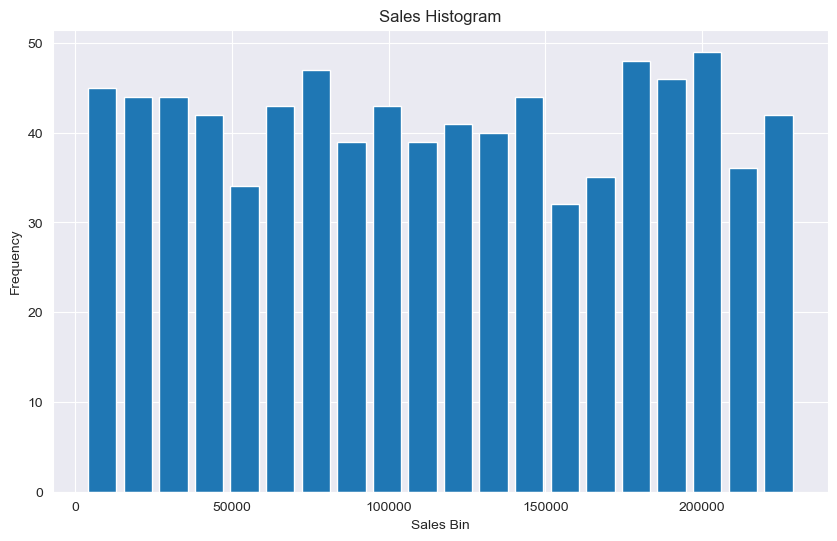

In [51]:
# Step 2-3. Check Histogram of sales. 
ax1 = bs.sales.hist(bins=20, rwidth=0.8, figsize=(10,6))
ax1.set(xlabel='Sales Bin', ylabel='Frequency', title='Sales Histogram')

[Text(0.5, 0, 'Price Bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Price Histogram')]

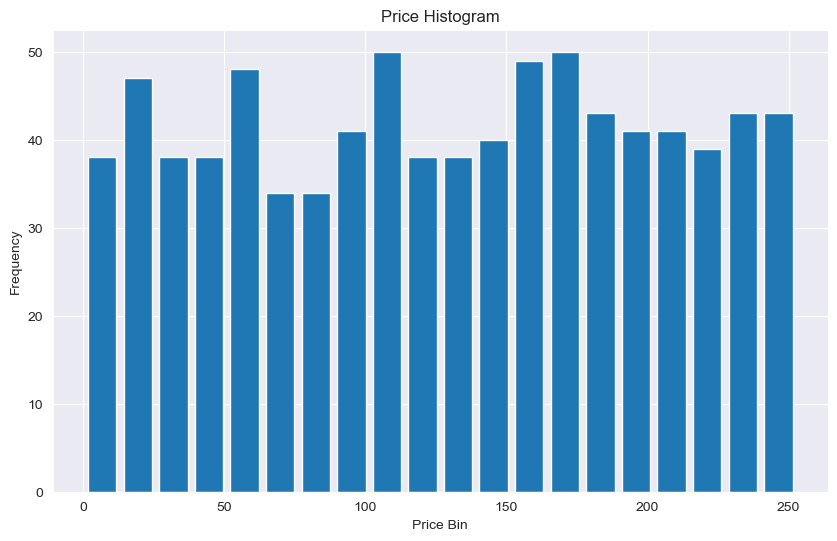

In [52]:
# Step 2-4. Check Histogram of price
ax2 = bs.price.hist(bins=20, rwidth=0.8, figsize=(10,6))
ax2.set(xlabel = 'Price Bin', ylabel = 'Frequency', title='Price Histogram')

C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\1370969283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs['pet_size_n'] = bs['pet_size'].map({'extra_small': 1, 'small':2, 'medium': 3, 'large': 4, 'extra_large': 5})


[Text(0.5, 0, 'Pet Size bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Pet Size Histogram')]

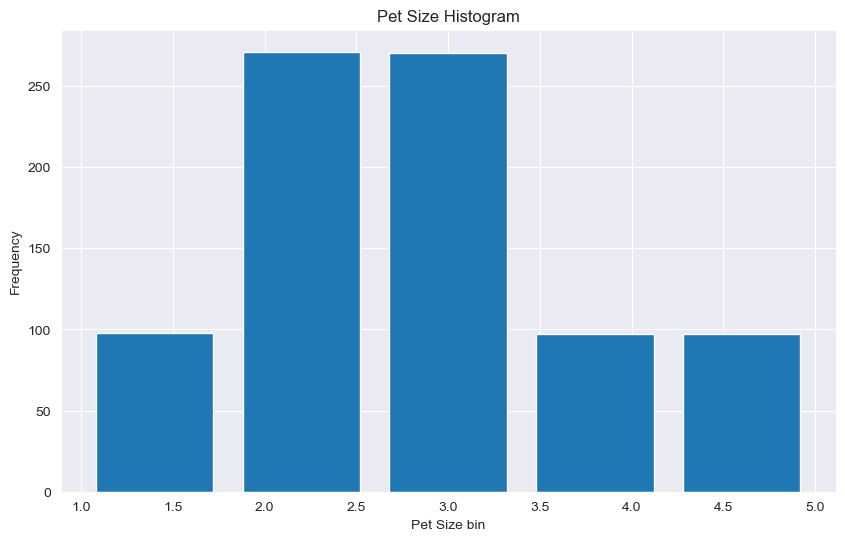

In [53]:

# Step 2-5. Check pet_size histogram. Convert pet size to ordinal variables.
bs['pet_size_n'] = bs['pet_size'].map({'extra_small': 1, 'small':2, 'medium': 3, 'large': 4, 'extra_large': 5})
ax3 = bs.pet_size_n.hist(bins=5, rwidth=0.8, figsize=(10,6))
ax3.set(xlabel='Pet Size bin', ylabel='Frequency', title='Pet Size Histogram')

<Figure size 1000x600 with 0 Axes>

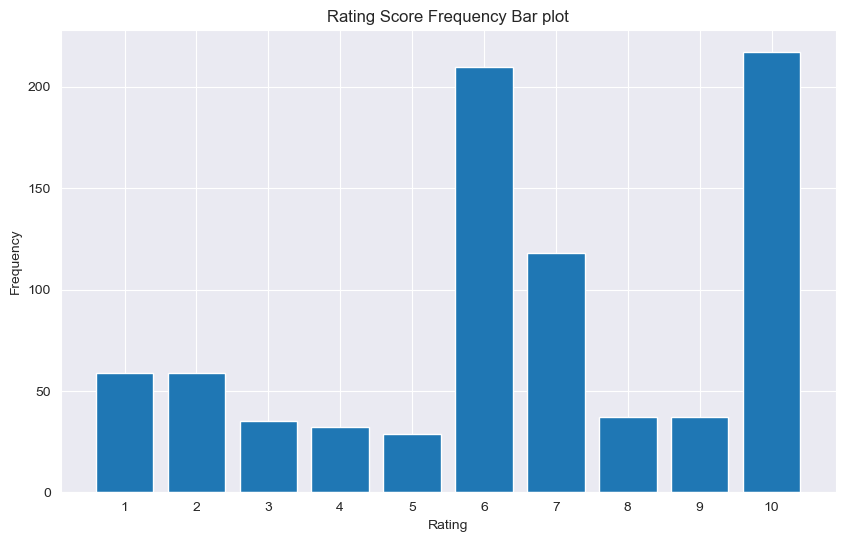

In [54]:
# Step 2-6. Check Rating histogram. Convert pet size to ordinal variables.
fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('rating')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
plt.xticks(name)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Score Frequency Bar plot')
plt.show()

<AxesSubplot:title={'center':'sales'}, xlabel='re_buy'>

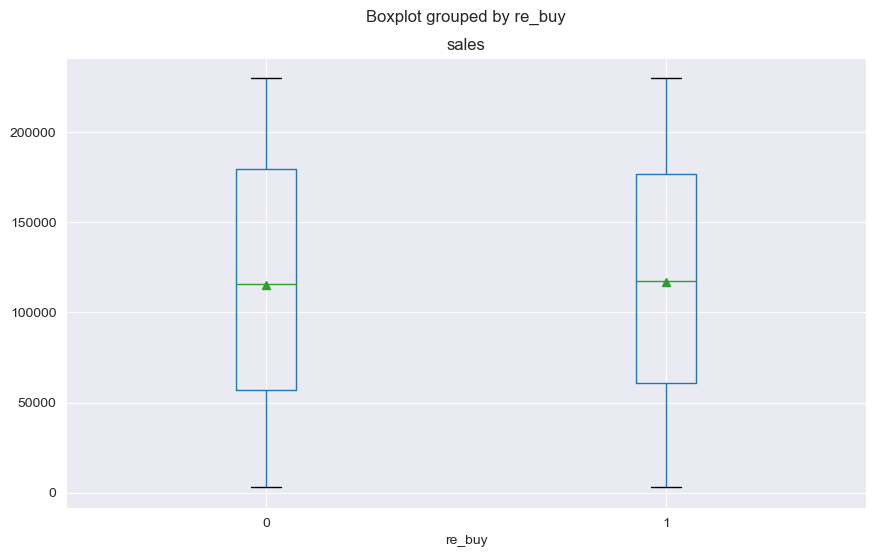

In [55]:
# Step 3-2. Check mean sales between re_buy product group
bs.boxplot(column = 'sales', by = 're_buy', grid = True, showmeans=True, figsize=(10, 6))

In [56]:
# Step 3-3. T-Test for re_buy group's sales mean
g1 = bs[bs['re_buy']==1] # Divide Two groups based on re_buy column
g2 = bs[bs['re_buy']==0]

print(stat.ttest_ind(g1['sales'], g2['sales'], equal_var=False)) # p-value = 0.749 , t = 0.322

# Difference between the two groups is not statistically significant.
# Customer Question 2. Do the products being purchased again have better sales than others?
# It seems that repurchased products have slightly more sales results than others. 
# But, this is not significant statistically.

Ttest_indResult(statistic=0.3228621637026388, pvalue=0.7468814018924621)


In [57]:
# Step 3-4. Equal Variance Test
print(stat.levene(g1['sales'], g2['sales'], center='mean'))

# p-value = 0.235, statistics = 1.413. So Sales distribution between re_buy = 1 and 0 could not assume equal variance.

LeveneResult(statistic=1.4134374121543911, pvalue=0.23482621687014876)


In [58]:
# Step 4-1. We need to check which pet type has significantly differencies bet ween re_buy factor. 
print(bs.groupby(['pet_type','re_buy'])['sales'].describe())

                 count           mean           std      min      25%  \
pet_type re_buy                                                         
bird     0        41.0  118560.975610  67456.300217   7000.0  66000.0   
         1        28.0  120892.857143  66204.698997  12000.0  60500.0   
cat      0       182.0  115587.912088  67446.729272   3000.0  61000.0   
         1       165.0  116315.151515  67090.656365   3000.0  64000.0   
dog      0       177.0  113627.118644  69906.893836   3000.0  49000.0   
         1       170.0  115217.647059  62044.217247   5000.0  58000.0   
fish     0        43.0  118953.488372  62020.716005   6000.0  82000.0   
         1        27.0  126777.777778  67995.097863   8000.0  68500.0   

                      50%       75%       max  
pet_type re_buy                                
bird     0       118000.0  180000.0  224000.0  
         1       142000.0  175250.0  221000.0  
cat      0       110000.0  182500.0  230000.0  
         1       109000.0  17

<AxesSubplot:title={'center':'sales'}, xlabel='[pet_type, re_buy]'>

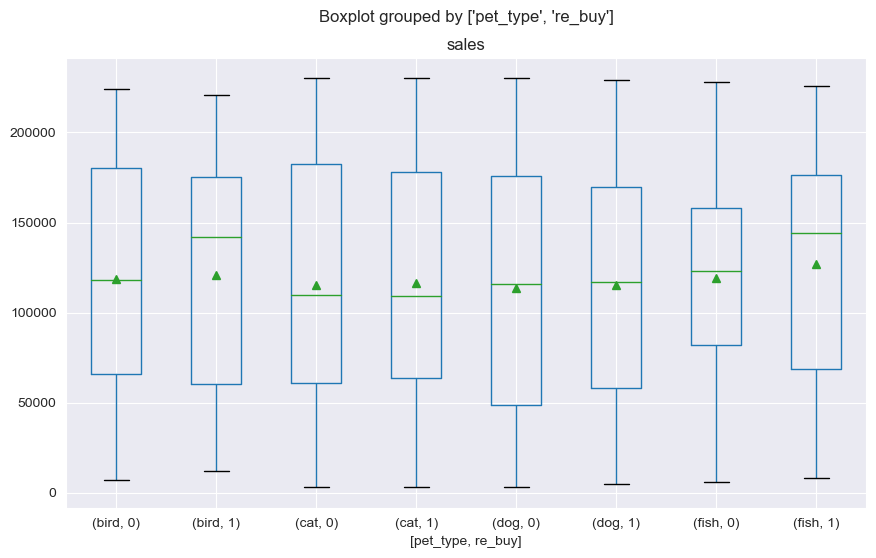

In [59]:
# Step 4-2. Check boxplot for pet_type and re_buy
bs.boxplot(column = 'sales', by = ['pet_type','re_buy'], grid = True, showmeans=True, figsize=(10, 6))

In [60]:
# Step 4-3. T-Test for each pet_type by re_buy Group
tstats = []
pet_type_unique = bs.pet_type.unique()
for x in pet_type_unique:
    inner = []
    tg = bs[bs['pet_type'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats.append(inner)
t_result = pd.DataFrame(tstats, columns=['pet_type', 't_stat', 'p_value', 'GAP'])
mean_result = bs.groupby(['pet_type','re_buy'])['sales'].mean().reset_index()
pd.merge(mean_result, t_result, on=['pet_type'])

# I could not find any statistical evidence that repurchasing items in pet_type makes more sales.

,pet_type,re_buy,sales,t_stat,p_value,GAP
0,bird,0,118560.975610,0.142569,0.887117,2331.881533
1,bird,1,120892.857143,0.142569,0.887117,2331.881533
2,cat,0,115587.912088,0.100585,0.919939,727.239427
3,cat,1,116315.151515,0.100585,0.919939,727.239427
4,dog,0,113627.118644,0.224365,0.822607,1590.528415
5,dog,1,115217.647059,0.224365,0.822607,1590.528415
6,fish,0,118953.488372,0.484600,0.630013,7824.289406
7,fish,1,126777.777778,0.484600,0.630013,7824.289406


In [61]:
# Step 4-4. We need to check which product category has significant differences bet ween re_buy factor. 
print(bs.groupby(['product_category','re_buy'])['sales'].describe())

                         count           mean           std      min      25%  \
product_category re_buy                                                         
Accessory        0        22.0  127136.363636  66597.079483  16000.0  81250.0   
                 1        20.0  149700.000000  66578.090279  29000.0  87750.0   
Bedding          0        18.0  125166.666667  61794.964577  11000.0  77000.0   
                 1        24.0  124291.666667  68143.377723  10000.0  77250.0   
Clothes          0        23.0  135695.652174  75671.800189   4000.0  53000.0   
                 1        19.0  117947.368421  67346.924110  40000.0  55500.0   
Equipment        0        68.0  113044.117647  68705.609022   3000.0  49500.0   
                 1        69.0  125507.246377  61079.654644   8000.0  77000.0   
Food             0        34.0  102264.705882  63923.395833   3000.0  44500.0   
                 1        37.0  107351.351351  76027.851701   3000.0  37000.0   
Grooming         0        24

[Text(1, 0, 'Acc - 0'),
 Text(2, 0, 'Acc - 1'),
 Text(3, 0, 'Bed - 0'),
 Text(4, 0, 'Bed - 1'),
 Text(5, 0, 'Clo - 0'),
 Text(6, 0, 'Clo - 1'),
 Text(7, 0, 'Equ - 0'),
 Text(8, 0, 'Equ - 1'),
 Text(9, 0, 'Foo - 0'),
 Text(10, 0, 'Foo - 1'),
 Text(11, 0, 'Gro - 0'),
 Text(12, 0, 'Gro - 1'),
 Text(13, 0, 'Hou - 0'),
 Text(14, 0, 'Hou - 1'),
 Text(15, 0, 'Med - 0'),
 Text(16, 0, 'Med - 1'),
 Text(17, 0, 'Sna - 0'),
 Text(18, 0, 'Sna - 1'),
 Text(19, 0, 'Sup - 0'),
 Text(20, 0, 'Sup - 1'),
 Text(21, 0, 'Toy - 0'),
 Text(22, 0, 'Toy - 1')]

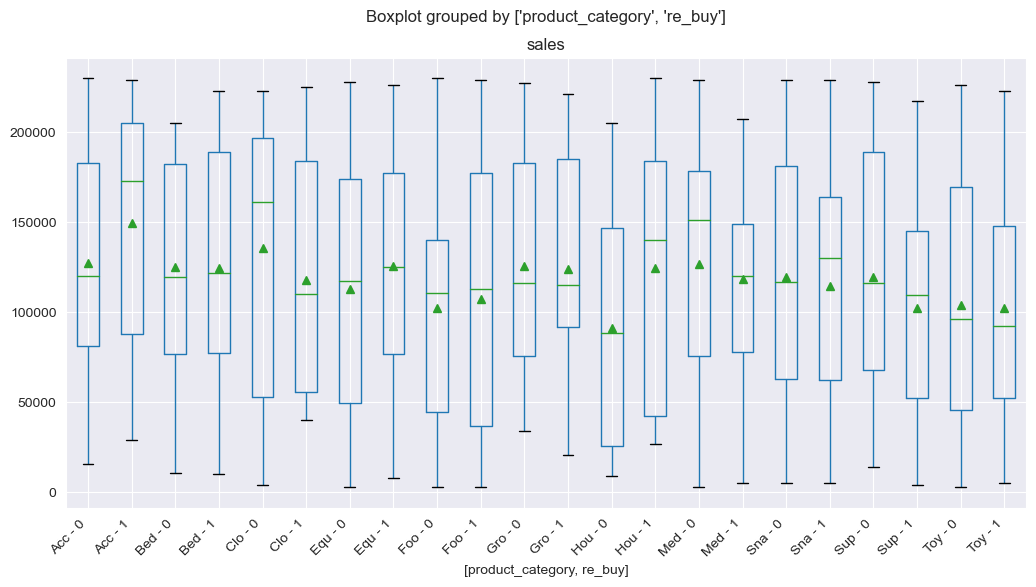

In [62]:
# Step 4-5. Check boxplot for product category and re_buy
xLab = [] 
un_list = bs.product_category.unique()
un_list.sort()
for txt in un_list :
    xLab.append(txt[0:3] + ' - 0')
    xLab.append(txt[0:3] + ' - 1')
ax = bs.boxplot(column = 'sales', by = ['product_category','re_buy'], grid = True, showmeans=True, figsize=(12, 6))
ax.set_xticklabels(labels=xLab,rotation=45, ha='right')

In [63]:
# Step 4-6. T-Test for each product category by re_buy Group
tstats = []
product_category_unique = bs.product_category.unique()
for x in product_category_unique:
    inner = []
    tg = bs[bs['product_category'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats.append(inner)
t_result = pd.DataFrame(tstats, columns=['product_category', 't_stat', 'p_value', 'GAP'])
mean_result = bs.groupby(['product_category','re_buy'])['sales'].mean().reset_index()
pd.merge(mean_result, t_result, on=['product_category'])

# Only an Accessory has a statistically significant difference between re_buy. Repurchased products have an average of 22,564 dollars more sales than none repurchased products.

,product_category,re_buy,sales,t_stat,p_value,GAP
0,Accessory,0,127136.363636,1.096782,0.279358,22563.636364
1,Accessory,1,149700.000000,1.096782,0.279358,22563.636364
2,Bedding,0,125166.666667,-0.043446,0.965571,-875.000000
3,Bedding,1,124291.666667,-0.043446,0.965571,-875.000000
4,Clothes,0,135695.652174,-0.803689,0.426357,-17748.283753
5,Clothes,1,117947.368421,-0.803689,0.426357,-17748.283753
6,Equipment,0,113044.117647,1.121544,0.264082,12463.128730
7,Equipment,1,125507.246377,1.121544,0.264082,12463.128730
8,Food,0,102264.705882,0.305956,0.760567,5086.645469
9,Food,1,107351.351351,0.305956,0.760567,5086.645469


In [64]:
# Step 5-1. Building Dummy variables for every nominal variable.
pet_type_unique = bs.pet_type.unique() # Checking for pet_type unique records
product_category_unique = bs.product_category.unique() # Cheking for product_category unique records
pet_size_unique = bs.pet_size.unique() # Checking for pet_size Unique records

# Built Pet Type Unique record's dummy
for x in pet_type_unique:
    bs[x + '_dummy'] = np.where(bs['pet_type'] == x, 1, 0) # Build Pet Type Dummy
    
# Built Product Category Unique record's dummy
for y in product_category_unique:
    bs[y + '_dummy'] = np.where(bs['product_category'] == y, 1, 0) # Build product Category Dummy
    
# Built Pet size Unique record's dummy
for z in pet_size_unique:
    bs[z + '_dummy'] = np.where(bs['pet_size'] == z, 1, 0) # Build pet size Dummy

bs.head(10) # Checking dummy variables

C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\2784956974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs[x + '_dummy'] = np.where(bs['pet_type'] == x, 1, 0) # Build Pet Type Dummy
C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\2784956974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs[x + '_dummy'] = np.where(bs['pet_type'] == x, 1, 0) # Build Pet Type Dummy
C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\2784956974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,pet_size_n,...,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1,2,...,0,0,0,0,0,1,0,0,0,0
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0,2,...,0,0,0,0,0,1,0,0,0,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1,4,...,0,0,0,0,0,0,1,0,0,0
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0,4,...,0,0,0,0,0,0,1,0,0,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0,4,...,0,0,0,0,0,0,1,0,0,0
6,4380,Toys,79000,175.75,VC_945,extra_small,dog,8,0,1,...,0,0,0,0,0,0,0,1,0,0
7,4389,Bedding,205000,170.01,VC_954,large,cat,9,0,4,...,0,0,0,0,0,0,1,0,0,0
8,4697,Supplements,116000,178.11,VC_1262,small,cat,10,0,2,...,0,0,0,0,0,1,0,0,0,0
9,4238,Medicine,141000,248.07,VC_803,medium,dog,10,1,3,...,0,0,0,0,0,0,0,0,1,0
10,4650,Snack,185000,188.23,VC_1215,extra_small,dog,10,1,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
# Step 5-2. Checking Correlations
corr = bs.corr() # Check correlations between all numeric values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(3))

# Check correlation between numeric variables and re_buy.
# Unfortunately, there are no bigger correlation variables for the re_buy column.
# So, I build a logistic regression model to figure out the probability of repurchasing.

C:\Users\yunsi\AppData\Local\Temp\ipykernel_3864\3796305639.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,sales,price,rating,re_buy,pet_size_n,fish_dummy,cat_dummy,dog_dummy,bird_dummy,Equipment_dummy,Toys_dummy,Snack_dummy,Supplements_dummy,Bedding_dummy,Medicine_dummy,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
price,0.008,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rating,0.003,0.057,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
re_buy,0.011,0.061,-0.091,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pet_size_n,0.008,0.032,0.084,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fish_dummy,0.027,-0.003,-0.022,-0.050,-0.124,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cat_dummy,-0.002,-0.012,0.031,0.012,0.152,-0.256,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dog_dummy,-0.022,-0.009,0.033,0.037,-0.115,-0.256,-0.714,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bird_dummy,0.015,0.040,-0.093,-0.038,0.059,-0.091,-0.254,-0.254,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Equipment_dummy,0.022,0.015,-0.097,0.032,-0.045,0.064,-0.040,-0.040,0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [66]:
# Step 5-3. Built Logistic Regression Model. Y is re_buy. It means classifying repurchased products.
# Define X and Y variables.
feature_cols = [
                # Numeric Variables
                'price', # Price for each product
                'rating', # Rating for each product
                #'pet_size_n', # Ordinal Variable for pet size 
                # ------------------------------------- Pet Type Dummy
                'cat_dummy', 
                'dog_dummy', 
                'fish_dummy', 
                # 'bird_dummy' is base dummy. Avoiding Dummy Trap
                # ------------------------------------- Product Category Dummy
                'Equipment_dummy', 
                'Toys_dummy', 
                'Snack_dummy',
                'Supplements_dummy', 
                'Bedding_dummy', 
                'Medicine_dummy',
                'Housing_dummy', # Generally housing is not purchasing more than once.
                'Food_dummy', 
                'Clothes_dummy', 
                'Accessory_dummy', 
                #'Grooming_dummy', is Base Dummy. Avoiding Dummy Trap
               ]
X = bs[feature_cols] # Independent Variables dataset
y = bs.re_buy # Dependent Variable
print(X.describe())
print(y.describe())

            price      rating   cat_dummy   dog_dummy  fish_dummy  \
count  833.000000  833.000000  833.000000  833.000000  833.000000   
mean   127.994802    6.530612    0.416567    0.416567    0.084034   
std     72.552580    2.843572    0.493286    0.493286    0.277605   
min      0.350000    1.000000    0.000000    0.000000    0.000000   
25%     63.300000    5.000000    0.000000    0.000000    0.000000   
50%    129.520000    6.000000    0.000000    0.000000    0.000000   
75%    189.250000   10.000000    1.000000    1.000000    0.000000   
max    252.690000   10.000000    1.000000    1.000000    1.000000   

       Equipment_dummy  Toys_dummy  Snack_dummy  Supplements_dummy  \
count       833.000000  833.000000   833.000000         833.000000   
mean          0.164466    0.164466     0.163265           0.085234   
std           0.370920    0.370920     0.369830           0.279397   
min           0.000000    0.000000     0.000000           0.000000   
25%           0.000000    0.

In [67]:
# Step 5-4. Fit Logistic Regression Model of entire dataset.
x_sm = sm.add_constant(X)
logit_model = sm.Logit(y, x_sm)
result = logit_model.fit(method = 'ncg')
print(result.summary2()) # Checking Coefficients and P-Values and Model Evaluation

# Price and rating are significant in p < 0.05 level.
# Model's p-value is significant in p < 0.1 level.
# Peudo R-squared: 0.02

Optimization terminated successfully.
         Current function value: 0.677240
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
         Hessian evaluations: 11
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.020    
Dependent Variable:  re_buy           AIC:              1160.2823
Date:                2023-01-02 23:54 BIC:              1235.8828
No. Observations:    833              Log-Likelihood:   -564.14  
Df Model:            15               LL-Null:          -575.70  
Df Residuals:        817              LLR p-value:      0.081491 
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.4188   0.4464 -0.9382 0.3482 -1.2936  0.4561
price              0.0020   0

C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted Label')

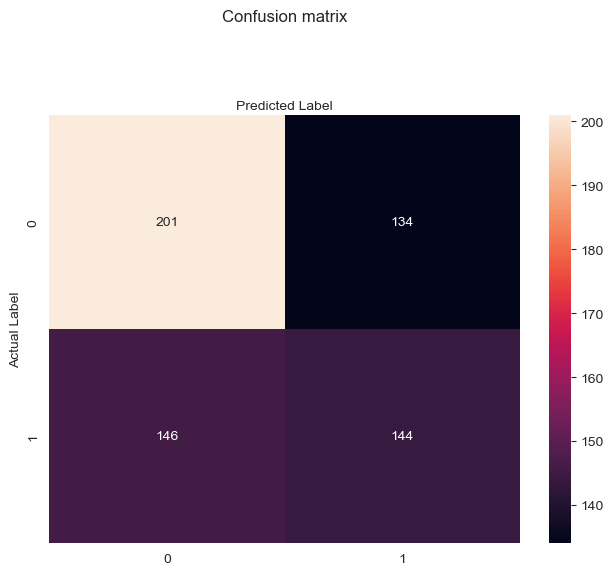

In [68]:
# Step 5-5. Logistic Regression ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0) # Set Trainning Dataset

logreg = LogisticRegression(random_state=0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix # Build confusion_matrix

class_names = [0,1] # Re_buy records
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

In [69]:
# Step 5-6. Classification Report Build
target_names = ['Onetime purchased', 'Repurchased']
print(classification_report(y_test, y_pred, target_names=target_names))

# Accuracy is 0.55 

                   precision    recall  f1-score   support

Onetime purchased       0.58      0.60      0.59       335
      Repurchased       0.52      0.50      0.51       290

         accuracy                           0.55       625
        macro avg       0.55      0.55      0.55       625
     weighted avg       0.55      0.55      0.55       625



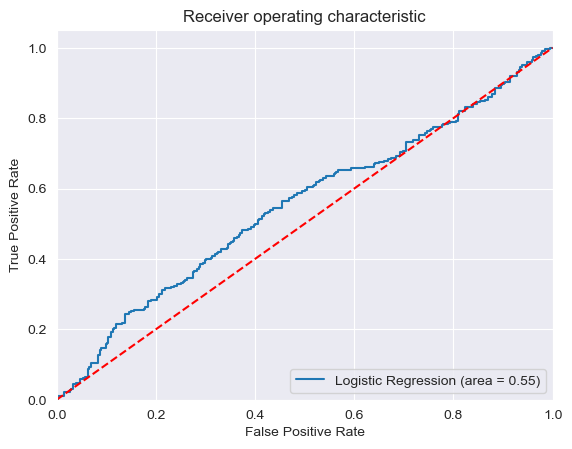

In [70]:
# Step 5-7. Checking ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [71]:
# Step 6-1. Subset for pet Type analysis: Dog
det = bs[bs['pet_type'] == 'dog']

# T-Test for each product category by re_buy Group in Dog pet-type.
tstats2 = []
product_category_unique = det.product_category.unique()
for x in product_category_unique:
    inner = []
    tg = det[det['product_category'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats2.append(inner)
t_result = pd.DataFrame(tstats2, columns=['product_category', 't_stat', 'p_value', 'GAP'])
mean_result = det.groupby(['product_category','re_buy'])['sales'].mean().reset_index()
print(pd.merge(mean_result, t_result, on=['product_category']))

# Only Housing has a statistically significant difference between re_buy. Repurchased products have an average of 59,557 dollars more sales than none repurchased products.

   product_category  re_buy          sales    t_stat   p_value           GAP
0         Accessory       0  150555.555556 -0.620992  0.543072 -23455.555556
1         Accessory       1  127100.000000 -0.620992  0.543072 -23455.555556
2           Bedding       0  146600.000000 -0.819011  0.435198 -25814.285714
3           Bedding       1  120785.714286 -0.819011  0.435198 -25814.285714
4           Clothes       0  141636.363636 -0.767776  0.453557 -23761.363636
5           Clothes       1  117875.000000 -0.767776  0.453557 -23761.363636
6         Equipment       0  108391.304348  0.553317  0.582879  10072.981366
7         Equipment       1  118464.285714  0.553317  0.582879  10072.981366
8              Food       0  105187.500000 -1.348507  0.187266 -28246.323529
9              Food       1   76941.176471 -1.348507  0.187266 -28246.323529
10         Grooming       0  113375.000000  0.532399  0.602594  15425.000000
11         Grooming       1  128800.000000  0.532399  0.602594  15425.000000

In [72]:
# Step 6-2. Subset for pet Type analysis: Cat
det = bs[bs['pet_type'] == 'cat']

# T-Test for each product category by re_buy Group in cat pet-type.
tstats2 = []
product_category_unique = det.product_category.unique()
for x in product_category_unique:
    inner = []
    tg = det[det['product_category'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats2.append(inner)
t_result = pd.DataFrame(tstats2, columns=['product_category', 't_stat', 'p_value', 'GAP'])
mean_result = det.groupby(['product_category','re_buy'])['sales'].mean().reset_index()
print(pd.merge(mean_result, t_result, on=['product_category']))

# Only an Accessory has a statistically significant difference between re_buy. Repurchased products have an average of 62,111 dollars more sales than none repurchased products.

   product_category  re_buy          sales    t_stat   p_value           GAP
0         Accessory       0  104777.777778  2.899781  0.010613  62111.111111
1         Accessory       1  166888.888889  2.899781  0.010613  62111.111111
2           Bedding       0  117500.000000  0.833186  0.416293  24722.222222
3           Bedding       1  142222.222222  0.833186  0.416293  24722.222222
4           Clothes       0  116222.222222 -0.158554  0.876085  -6022.222222
5           Clothes       1  110200.000000 -0.158554  0.876085  -6022.222222
6         Equipment       0  108208.333333  1.170211  0.247823  20865.740741
7         Equipment       1  129074.074074  1.170211  0.247823  20865.740741
8              Food       0  113600.000000  0.864320  0.394053  22566.666667
9              Food       1  136166.666667  0.864320  0.394053  22566.666667
10         Grooming       0  128916.666667 -0.373597  0.715083 -11630.952381
11         Grooming       1  117285.714286 -0.373597  0.715083 -11630.952381

In [73]:
# Step 6-3. Built Logistic Regression Model. Y is re_buy. It means classifying repurchased products. For Dog products only.
# Define X and Y variables.
feature_cols = [
                # Numeric Variables
                'price', # Price for each product
                'rating', # Rating for each product
                #'pet_size_n', # Ordinal Variable for pet size 
                # ------------------------------------- Product Category Dummy
                'Equipment_dummy', 
                #'Toys_dummy', 
                'Snack_dummy',
                'Supplements_dummy', 
                'Bedding_dummy', 
                'Medicine_dummy',
                'Housing_dummy', # Generally housing is not purchasing more than once.
                'Food_dummy', 
                'Clothes_dummy', 
                'Accessory_dummy', 
                'Grooming_dummy', #is Base Dummy. Avoiding Dummy Trap
                # -------------------------------------- Pet Size Dummy
                'extra_small_dummy',
                'small_dummy',
                'medium_dummy',
                #'large_dummy',
                'extra_large_dummy'
               ]
det = bs[bs['pet_type'] == 'dog']
X = det[feature_cols] # Independent Variables dataset
y = det.re_buy # Dependent Variable

x_sm = sm.add_constant(X)
logit_model = sm.Logit(y, x_sm)
result = logit_model.fit(method = 'ncg')
print(result.summary2()) # Checking Coefficients and P-Values and Model Evaluation

# Rating, Bedding_Dummy, Medicine_Dummy, and Food_Dummy are significant in p < 0.05 level.
# Price and Equipment_Dummy are significant in p < 0.1 Level.
# Model's p-value is significant in p < 0.01 level.
# Peudo R-squared: 0.071.

Optimization terminated successfully.
         Current function value: 0.643619
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Hessian evaluations: 10
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.071    
Dependent Variable:  re_buy           AIC:              480.6715 
Date:                2023-01-02 23:54 BIC:              546.1100 
No. Observations:    347              Log-Likelihood:   -223.34  
Df Model:            16               LL-Null:          -240.45  
Df Residuals:        330              LLR p-value:      0.0050560
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.2072   0.5531 -0.3747 0.7079 -1.2913  0.8768
price              0.0027   0

C:\Users\yunsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted Label')

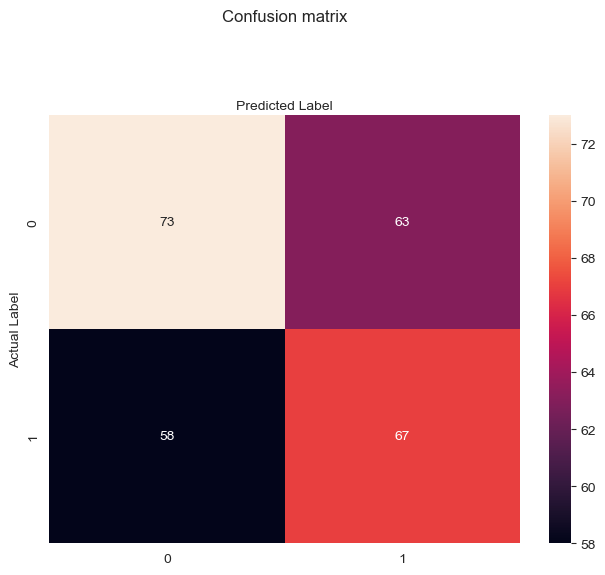

In [74]:
# Step 6-4. Logistic Regression ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0) # Set Trainning Dataset

logreg = LogisticRegression(random_state=0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix # Build confusion_matrix

class_names = [0,1] # Re_buy records
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

In [75]:
# Step 6-5. Classification Report Build
target_names = ['Onetime purchased', 'Repurchased']
print(classification_report(y_test, y_pred, target_names=target_names))

# Accuracy is 0.54

                   precision    recall  f1-score   support

Onetime purchased       0.56      0.54      0.55       136
      Repurchased       0.52      0.54      0.53       125

         accuracy                           0.54       261
        macro avg       0.54      0.54      0.54       261
     weighted avg       0.54      0.54      0.54       261



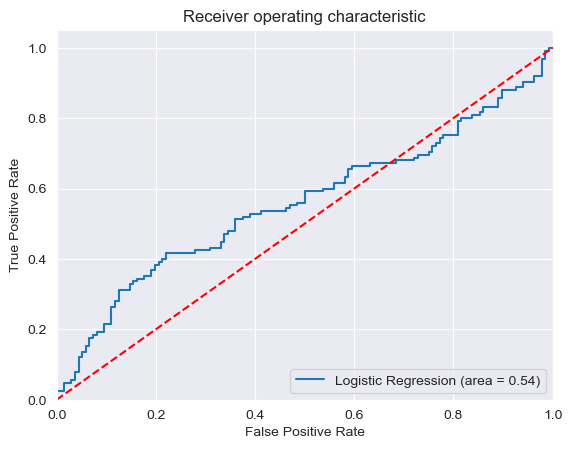

In [76]:
# Step 6-6. Checking ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

array([[<AxesSubplot:title={'center':'Accessory'}>,
        <AxesSubplot:title={'center':'Bedding'}>,
        <AxesSubplot:title={'center':'Clothes'}>],
       [<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Food'}>,
        <AxesSubplot:title={'center':'Grooming'}>],
       [<AxesSubplot:title={'center':'Housing'}>,
        <AxesSubplot:title={'center':'Medicine'}>,
        <AxesSubplot:title={'center':'Snack'}>],
       [<AxesSubplot:title={'center':'Supplements'}>,
        <AxesSubplot:title={'center':'Toys'}>, <AxesSubplot:>]],
      dtype=object)

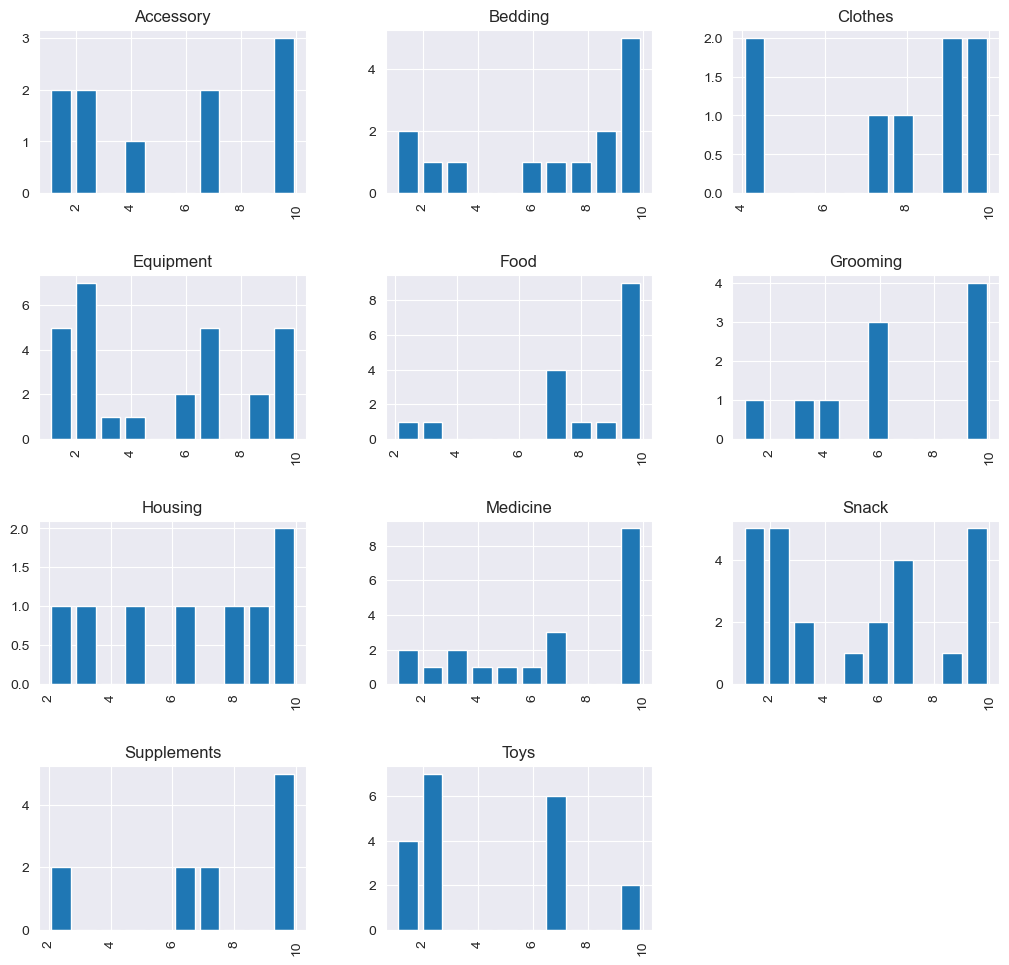

In [77]:
# Step 7-1. Why rating has negative coefficients? Checking for repurchased items.
det.groupby(['product_category', 're_buy'])['rating'].describe()
det[det['re_buy'] == 1].rating.hist(by=det['product_category'], bins=10, rwidth=0.8, figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Accessory'}>,
        <AxesSubplot:title={'center':'Bedding'}>,
        <AxesSubplot:title={'center':'Clothes'}>],
       [<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Food'}>,
        <AxesSubplot:title={'center':'Grooming'}>],
       [<AxesSubplot:title={'center':'Housing'}>,
        <AxesSubplot:title={'center':'Medicine'}>,
        <AxesSubplot:title={'center':'Snack'}>],
       [<AxesSubplot:title={'center':'Supplements'}>,
        <AxesSubplot:title={'center':'Toys'}>, <AxesSubplot:>]],
      dtype=object)

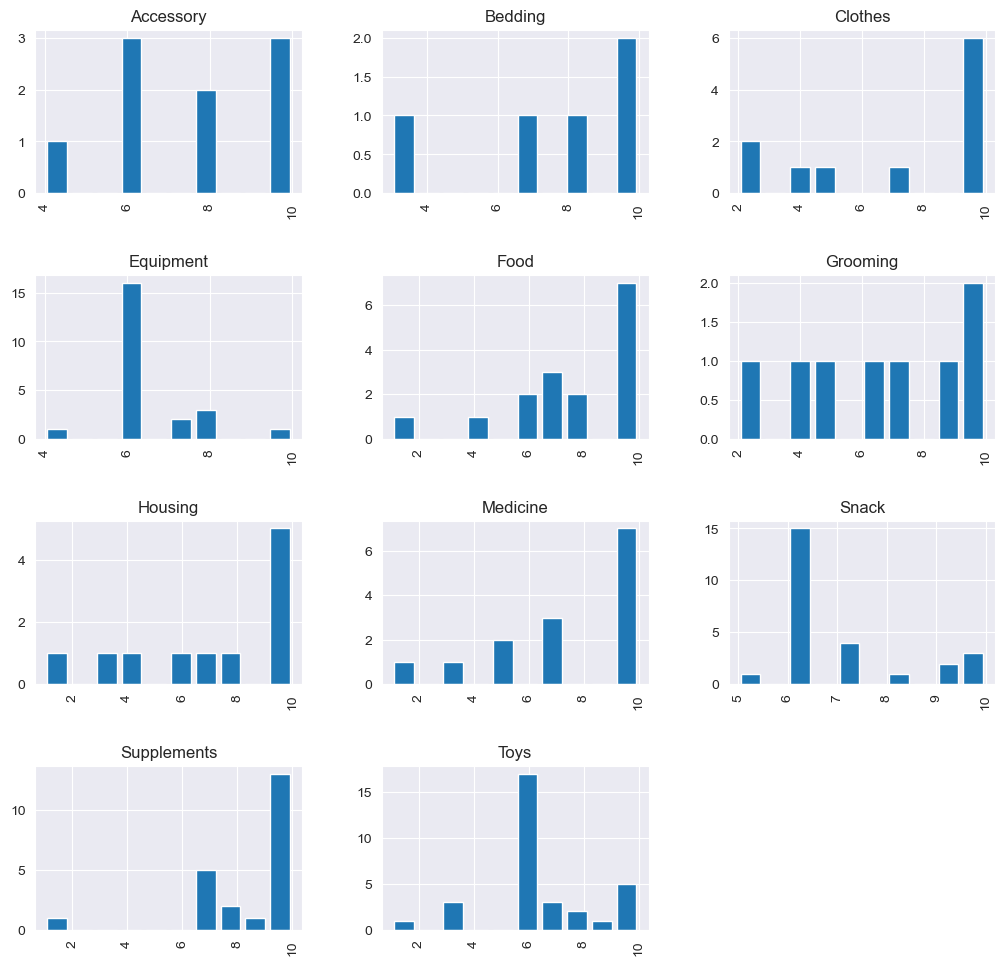

In [78]:
# Step 7-2. Why rating has negative coefficients? Checking for ontime-purchased items.
det[det['re_buy'] == 0].rating.hist(by=det['product_category'], bins=10, rwidth=0.8, figsize=(12, 12))

In [79]:
# Step 8. Subscription Item Suggestion List
# Bedding_Dummy, Medicine_Dummy, Food_Dummy, Equipment_Dummy for dog product

final = bs[(bs['pet_type'] == 'dog') & (
                                (bs['product_category'] == 'Bedding') 
                                 | (bs['product_category'] == 'Medicine')
                                 | (bs['product_category'] == 'Food')
                                 | (bs['product_category'] == 'Equipment')
                               )]
final.sort_values(by=['rating', 'product_category'], ascending=[False, True])

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,pet_size_n,...,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
237,4576,Bedding,188000,77.54,VC_1141,extra_large,dog,10,0,5,...,0,0,0,0,0,0,0,0,0,1
640,4598,Bedding,10000,70.07,VC_1163,medium,dog,10,1,3,...,0,0,0,0,0,0,0,0,1,0
728,4620,Bedding,199000,13.51,VC_1185,extra_small,dog,10,1,1,...,0,0,0,0,0,0,0,1,0,0
790,4378,Bedding,54000,152.20,VC_943,medium,dog,10,1,3,...,0,0,0,0,0,0,0,0,1,0
801,4642,Bedding,36000,138.11,VC_1207,small,dog,10,1,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,4842,Equipment,199000,14.55,VC_1407,small,dog,1,1,2,...,0,0,0,0,0,1,0,0,0,0
717,4484,Food,95000,7.58,VC_1049,large,dog,1,0,4,...,0,1,0,0,0,0,1,0,0,0
267,4370,Medicine,147000,85.60,VC_935,extra_small,dog,1,1,1,...,0,0,0,0,0,0,0,1,0,0
286,4502,Medicine,135000,107.02,VC_1067,small,dog,1,1,2,...,0,0,0,0,0,1,0,0,0,0
